# Изучение рынка заведений общественного питания Москвы

### Цели и задачи проекта

**Цель:** Изучить рынки заведений общественного питания Москвы с целью проведения исследовательского анализа

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Файл **`/datasets/rest_info.csv`** содержит информацию о заведениях общественного питания:

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):

`0` — заведение не является сетевым;

`1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл **`/datasets/rest_price.csv`** содержит информацию о среднем чеке в заведениях общественного питания:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

«Средний счёт: 1000–1500 ₽»;

«Цена чашки капучино: 130–220 ₽»;

«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца
- `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [127]:
!pip install phik

In [128]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [129]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [130]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [131]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 8 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов овормлены в определённом виде, что говорит о том, что с ними нет необходимости работать и изменять каким-либо образом.
6 столбцов представлены типом данных object, 1 столбец в виде int64 и 2 столбца - float64. Значения в столбце `chain` представлены целыми числами, что показывает является ли заведение сетевым или нет, и содержит значения 1 или 0.
Пропуски содержатся только в столбцах `hours`, `seats`. 
Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
Теперь познакомимся с данными датасета `rest_price.csv`.

In [132]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [133]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о ценах в заведениях общественного питания Москвы

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов оформлены в удобном нам формате, что говорит о том, что с ними нет необходимости работать и изменять каким-либо образом.
- 3 столбца представлены типом данных object и 2 столбца - float64.
- Пропуски содержатся только в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_avg_bill`. Больше всего пропусков в столбце `middle_avg_bill`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [174]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, on='id', how='left')

In [175]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [176]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Данные соединены, и информация обо всех заведениях сохранилась.

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

По моему мнению типы данных представлены корректны и нет необходимости их корректировать

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [177]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [216]:
#Данные отсортированы
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
is_24_7                 0
dtype: int64

In [178]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме в 6 столбцах встречаются пропуски, моё решение не заполнять и не менять эти данные никакими вводынми, чтобы не искажать общую картину и не повлиять на точность статистических анализов

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [179]:
# Проверяем полные дубликаты в датафрейме bank_df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [180]:
# Проверяем неявные дубликаты в датафрейме bank_df
df.duplicated(subset='id').sum()

0

In [221]:
# Проверяем неявные дубликаты в датафрейме bank_df
df.duplicated(subset='name').sum()

2792

In [228]:
# Проверяем неявные дубликаты в датафрейме bank_df
df.duplicated(subset='address').sum()

2653

In [230]:
#Проверяем дубли в связке name и address
duplicates_count = df.duplicated(subset=['name', 'address'], keep=False).sum()
duplicates_count

0

Здесь тоже всё хорошо полных дубликатов нет, неявные оставим как есть, так как нет возможности понять, насколько они действительно неверные

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [181]:
def open_hours(x):
    if isinstance(x, str) and ('ежедневно' in x or 'круглосуточно' in x):
        return True
    return False

df['is_24_7'] = df['hours'].apply(open_hours)

In [182]:
# Проверяем, верно ли отображаются данные в новом столбце с помощью вывода первых строк датафрейма на экран
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,True
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,True
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,True
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,True


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В результате предобработки данных были выполнены следующие действия:

- Изучены пропуски в данных. Пропуски обнаружились в столбцах `price`, `avg_bill`, `middle_avg_bill`.
- Данные проверили на явные и неявные дубликаты — в данных их нет.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [183]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [231]:
# Проверяем долевое распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category:


кафе               0.282893
ресторан           0.243041
кофейня            0.168094
бар,паб            0.091006
пиццерия           0.075303
быстрое питание    0.071734
столовая           0.037473
булочная           0.030454
Name: category, dtype: float64

Результаты показывают, что всего в этом столбце 8 уникальных значений, ресторан - это самая популярная категория, булочная - с минимальным количеством заведений

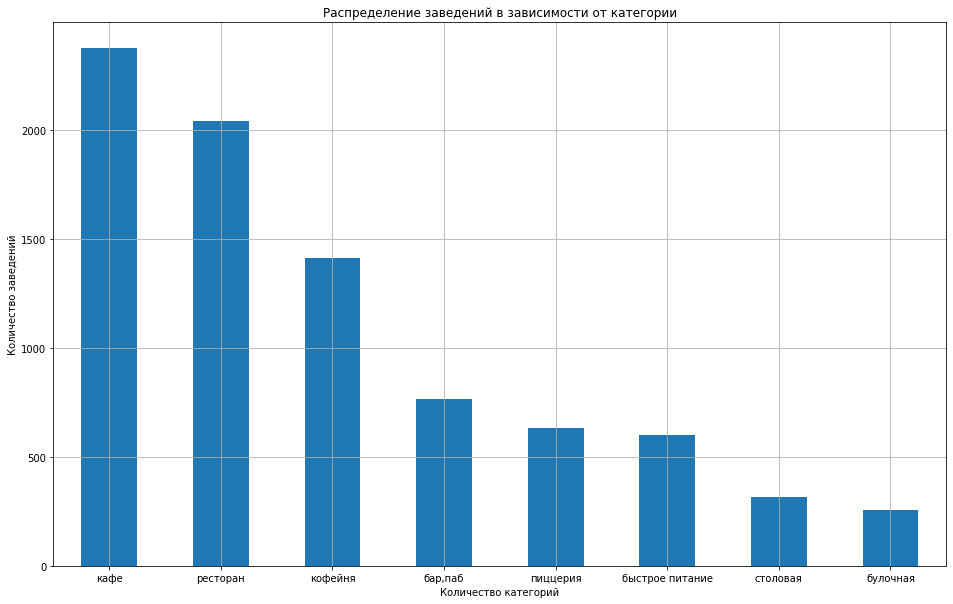

In [184]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Количество категорий')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Теперь мы визуально представили распределение заведений по категориям и это хорошо видно на графике

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [185]:
# Проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')
df['district'].value_counts()

Распределение данных по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

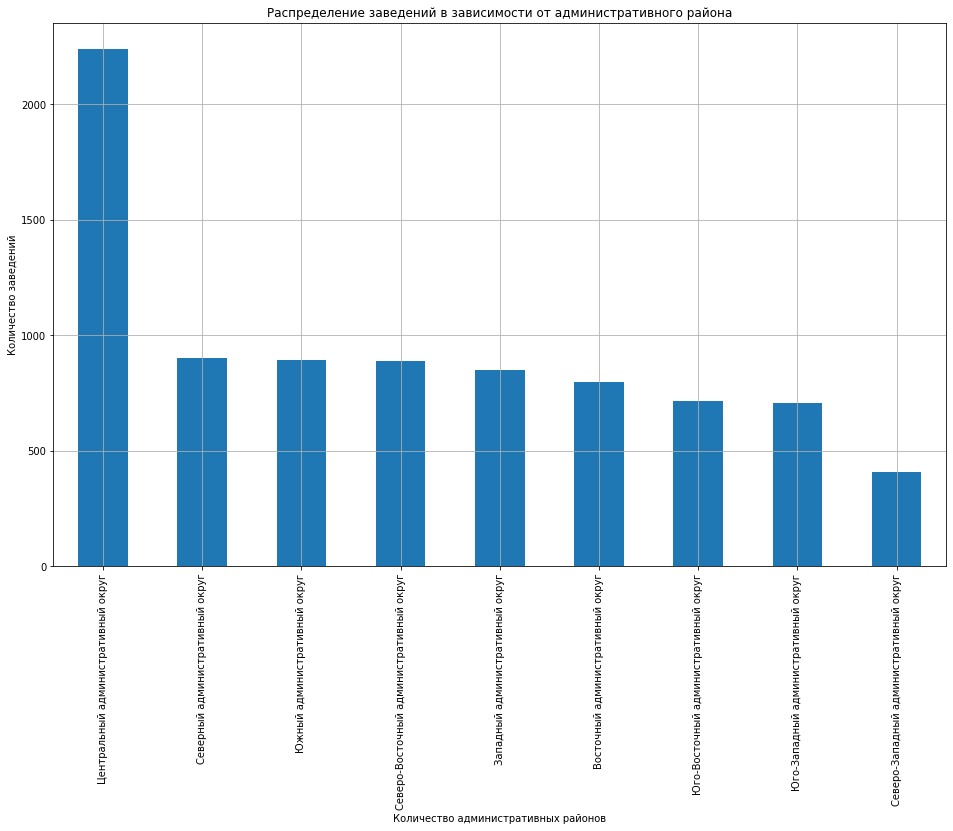

In [232]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от административного района'
)

# Настраиваем оформление графика
plt.xlabel('Количество административных районов')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Сейчас нам наглядно представлена информация о том, что в Центральном административном округе больше всего заведений, а именно их более, чем в 3 раз больше, чем во всех остальных районах.

In [187]:
# Фильтруем данные для Центрального административного округа
central_df = df[df['district'] == 'Центральный административный округ']

# Проверяем распределение заведений по категориям в Центральном округе
print('Распределение заведений по категориям в Центральном административном округе:')
central_df['category'].value_counts()

Распределение заведений по категориям в Центральном административном округе:


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

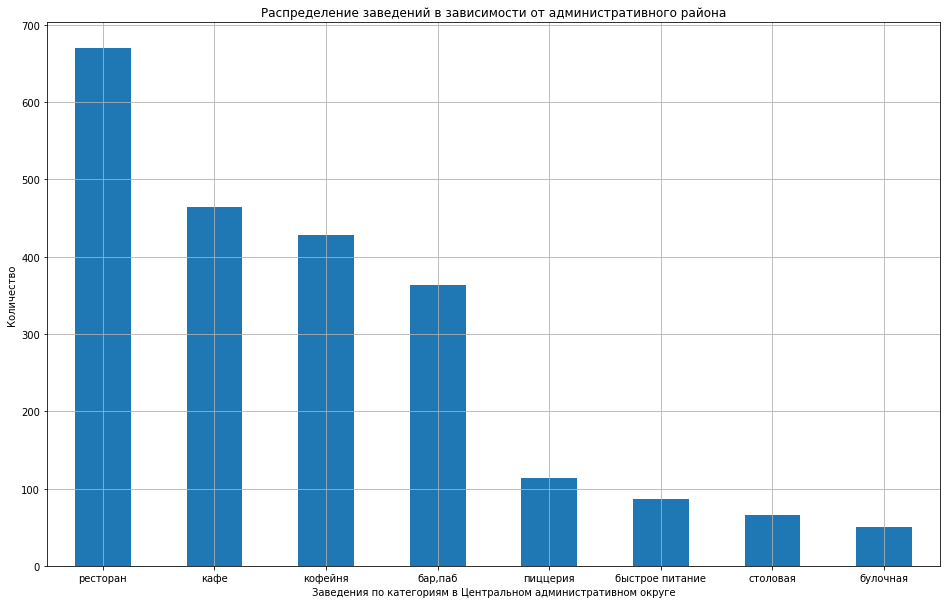

In [188]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
central_df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от административного района'
)

# Настраиваем оформление графика
plt.xlabel('Заведения по категориям в Центральном административном округе')
plt.ylabel('Количество')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Исходя из графика выше, можно сделать вывод, что ресторанов в ЦАО в 2 раза больше, чем баров, кофеен и кафе

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

Анализ общего соотношения сетевых и несетевых заведений:

In [189]:
print('Общее соотношение сетевых и несетевых заведений:')
df['chain'].value_counts()

Общее соотношение сетевых и несетевых заведений:


0    5201
1    3205
Name: chain, dtype: int64

In [190]:
# Проверяем распределение данных по значениям в столбце chain
for column in ['chain']:
    print(f'Распределение данных по значениям столбца chain:')
    print(df[column].value_counts(normalize=True))
    print()

Распределение данных по значениям столбца chain:
0    0.618725
1    0.381275
Name: chain, dtype: float64



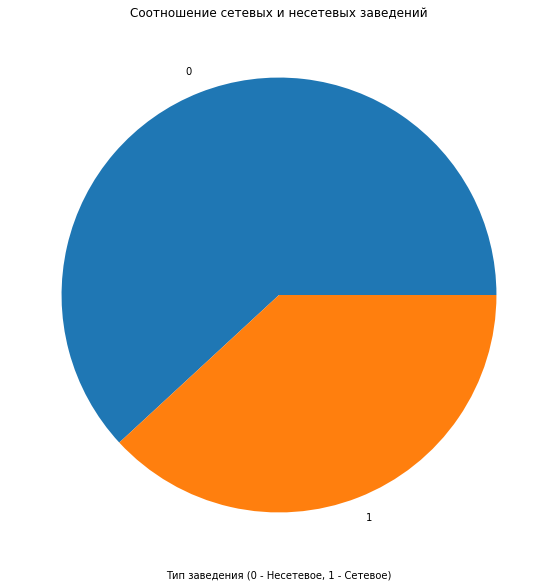

In [235]:
plt.figure(figsize=(16, 10))

df['chain'].value_counts(normalize=True).plot(
    kind='pie',
    legend=False,
    title='Соотношение сетевых и несетевых заведений'
)

plt.xlabel('Тип заведения (0 - Несетевое, 1 - Сетевое)')  # Убираем метку по оси X, так как для круговой диаграммы она не нужна
plt.ylabel('')  # Убираем метку по оси Y

# Выводим график
plt.show()

Из полученных данных видно, что несетевых заведений (5201) больше, чем сетевых (3205). Это означает, что большинство заведений в рассматриваемой выборке являются несетевыми

In [192]:
print('Соотношение сетевых и несетевых заведений по категориям:')
df.groupby('category')['chain'].value_counts()

Соотношение сетевых и несетевых заведений по категориям:


category         chain
бар,паб          0         596
                 1         169
булочная         1         157
                 0          99
быстрое питание  0         371
                 1         232
кафе             0        1599
                 1         779
кофейня          1         720
                 0         693
пиццерия         1         330
                 0         303
ресторан         0        1313
                 1         730
столовая         0         227
                 1          88
Name: chain, dtype: int64

In [193]:
#Сводная таблица: значения сетевых и несетевых заведений по категориям
pivot_chain_category = df.pivot_table(values='id', index='category', columns='chain', aggfunc='count')
#Переведём в доли
pivot_chain_category_proportions = pivot_chain_category.div(pivot_chain_category.sum(axis=1), axis=0)
print('распределение доли сетевых и несетевых заведений по категориям:')
pivot_chain_category_proportions

распределение доли сетевых и несетевых заведений по категориям:


chain,0,1
category,,
"бар,паб",0.779085,0.220915
булочная,0.386719,0.613281
быстрое питание,0.615257,0.384743
кафе,0.672414,0.327586
кофейня,0.490446,0.509554
пиццерия,0.478673,0.521327
ресторан,0.642682,0.357318
столовая,0.720635,0.279365


<Figure size 1152x720 with 0 Axes>

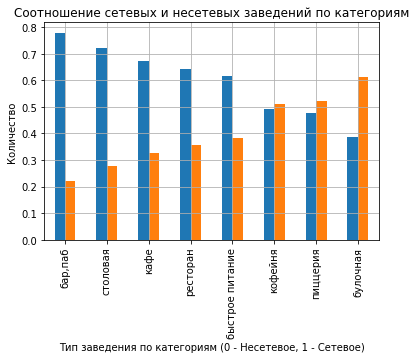

In [243]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 10))

# Сортируем значения по убыванию перед построением графика
sorted_pivot = pivot_chain_category_proportions.sort_values(by=[0,1], ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
sorted_pivot.plot(
    kind='bar',  # Тип графика — столбчатая диаграмма
    rot=90,      # Градус вращения подписи по оси Х
    legend=False,  # Выключаем легенду
    title=f'Соотношение сетевых и несетевых заведений по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведения по категориям (0 - Несетевое, 1 - Сетевое)')
plt.ylabel('Количество')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Также выведем категорий заведений, которые являются сетевыми

In [195]:
chain_ratio = df.groupby('category')['chain'].mean()
print('Категории с наибольшим соотношением сетевых заведений:')
print(chain_ratio.sort_values(ascending=False))

Категории с наибольшим соотношением сетевых заведений:
category
булочная           0.613281
пиццерия           0.521327
кофейня            0.509554
быстрое питание    0.384743
ресторан           0.357318
кафе               0.327586
столовая           0.279365
бар,паб            0.220915
Name: chain, dtype: float64


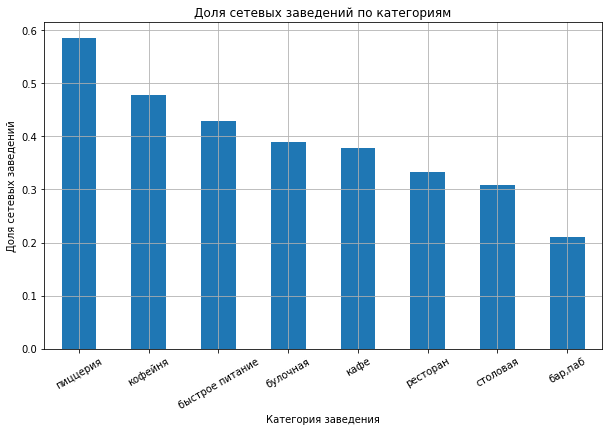

In [156]:
chain_ratio.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), rot=30)
# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')
plt.title('Доля сетевых заведений по категориям')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Можно сделать следующие выводы:

- Наибольшая доля сетевых заведений приходится на **пиццерии** (около 0,6), что указывает на высокую популярность этой категории среди сетевых предприятий.
- **Кофейни и заведения быстрого питания** также имеют значительную долю (около 0,5 и 0,45 соответственно), что говорит о востребованности этих форматов.
- **Булочные, кафе и рестораны** занимают промежуточное положение с долей около 0,35–0,4, что свидетельствует о стабильном, но менее массовом присутствии сетевых заведений в этих категориях.
- **Бары/пабы** имеют наименьшую долю сетевых заведений (около 0,25 и 0,15 соответственно), что может быть связано с их спецификой и меньшей привлекательностью для сетевых форматов.

Таким образом, сетевые заведения наиболее распространены в категориях, связанных с быстрым и удобным обслуживанием, таких как пиццерии, кофейни и быстрое питание.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [196]:
# Описательная статистика
print(df['seats'].describe())

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


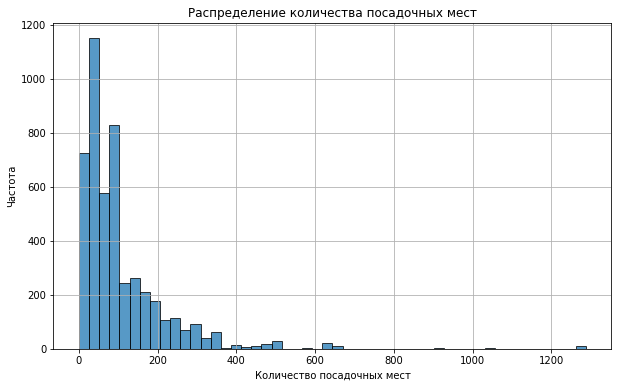

In [197]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

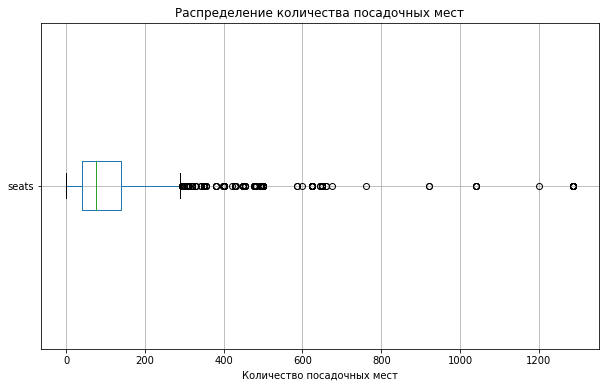

In [198]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

In [199]:
# Выводим статистические показатели
print("Статистические показатели по категориям:")
print(category_seats.describe())

Статистические показатели по категориям:
                 count        mean         std  min    25%   50%    75%  \
category                                                                  
бар,паб          334.0  119.371257  131.736017  0.0  48.00  85.0  142.5   
булочная          34.0  106.882353  107.329220  0.0  36.50  89.0  150.0   
быстрое питание  157.0  105.611465   93.371237  0.0  40.00  75.0  155.0   
кафе             412.0   91.361650   97.825595  0.0  37.50  60.0  100.0   
кофейня          427.0  107.740047  113.569426  0.0  40.00  80.0  140.0   
пиццерия         321.0   96.190031  103.199101  0.0  30.00  55.0  120.0   
ресторан         744.0  123.112903  120.213855  0.0  50.00  90.0  150.0   
столовая          90.0  104.733333  136.906825  0.0  40.25  80.0  120.0   

                    max  
category                 
бар,паб          1288.0  
булочная          478.0  
быстрое питание   450.0  
кафе              625.0  
кофейня           650.0  
пиццерия          625.0  


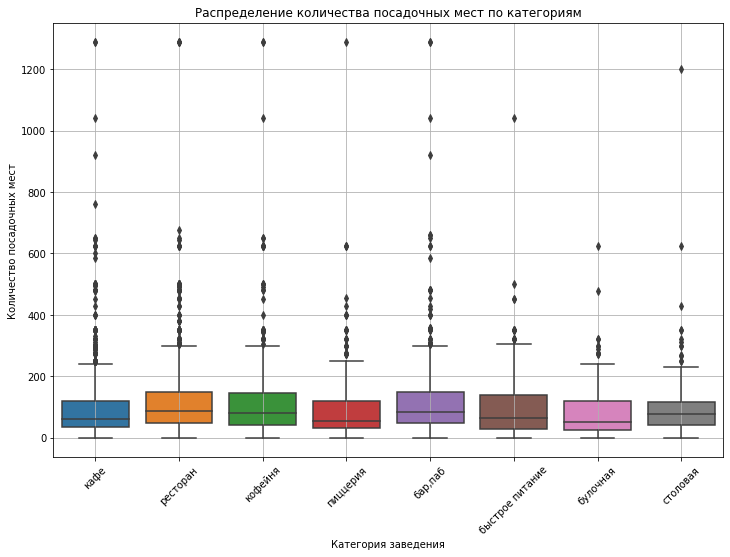

In [200]:
# Группируем данные по категориям
category_seats = df.groupby('category')['seats']

# Ящик с усами по категориям
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='seats', data=df)
plt.title('Распределение количества посадочных мест по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=45)

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<Figure size 1008x720 with 0 Axes>

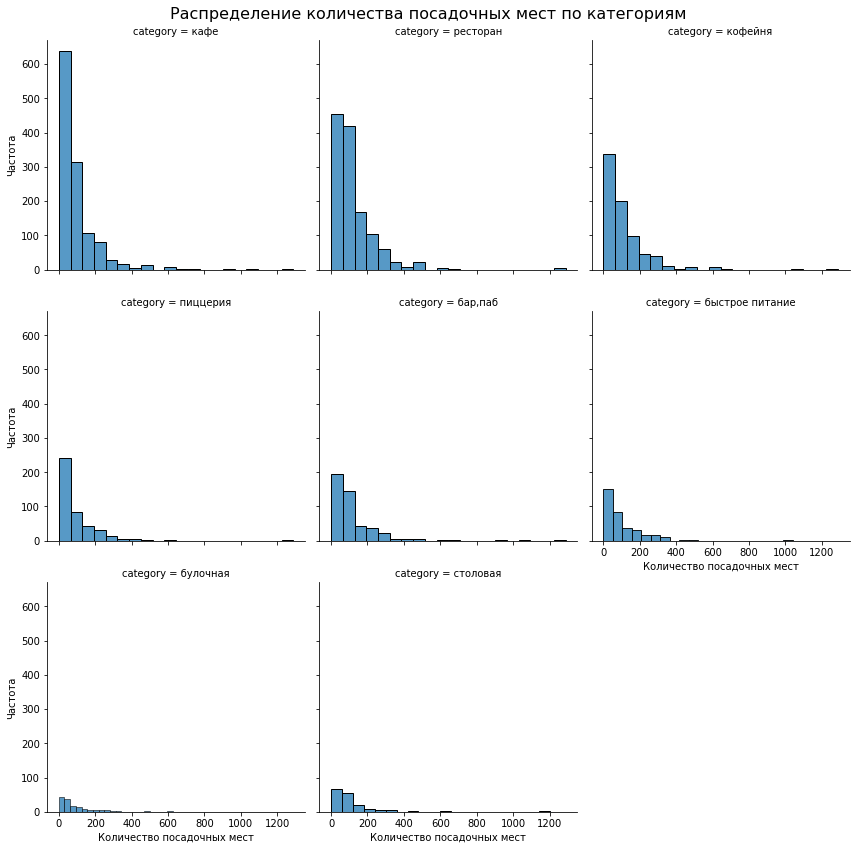

In [201]:
# Гистограмма по категориям
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(df, col='category', col_wrap=3, height=4)
g.map(sns.histplot, 'seats', bins=20)
g.set_axis_labels('Количество посадочных мест', 'Частота')
g.fig.suptitle('Распределение количества посадочных мест по категориям', fontsize=16)
plt.tight_layout()

# Выводим график
plt.show()

Могу отметить, что аномальные выбросы встречаются, это может быть связано с ошибкой ввода или некорректным считыванием данных из внешних источников, также можно допустить тот факт, если брать категорию рестораны, что такое количество посадочных мест возможно

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [202]:
# Изучаем статистические показатели столбца rating
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [203]:
# Группируем данные по категориям и вычисляем средний рейтинг
average_ratings = df.groupby('category')['rating'].mean()
average_ratings

category
бар,паб            4.387712
булочная           4.268359
быстрое питание    4.050249
кафе               4.123886
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290357
столовая           4.211429
Name: rating, dtype: float64

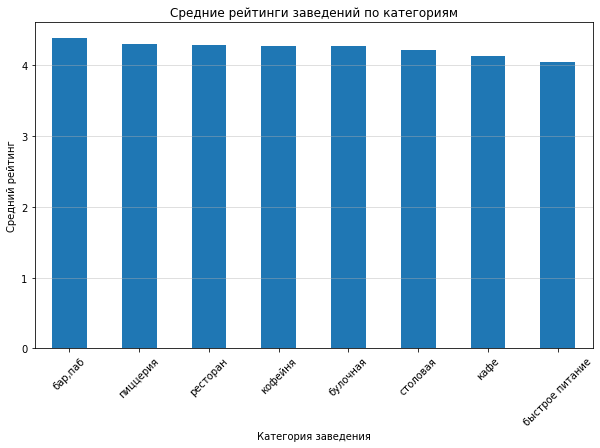

In [204]:
# Группируем данные по категориям и вычисляем средний рейтинг
average_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Визуализация средних рейтингов
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar')
plt.title('Средние рейтинги заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45)  # Поворот меток категорий для лучшего отображения
plt.show()

Из представленных данных видно, что усреднённые рейтинги для разных типов заведений общепита варьируются, но разница между ними не очень велика.

Рейтинг **пабов/баров** является самым высоким, за ним следуют **пиццерии** и **рестораны** (4.293421). Самые низкие средние рейтинги у **заведений быстрого питания**.

Таким образом, можно сделать вывод, что различия в рейтингах есть, но они не являются существенными и колеблются в пределах небольшого диапазона.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [205]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['district', 'category', 'rating', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False) 

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200691
category,0.190003
chain,0.108092
is_24_7,0.029290
seats,0.000000


Обобщим, что показывают результаты: наибольшая корреляция рейтинга клиентов наблюдается с ценой (0.22), категорией (0.21), расположением в административном районе (0.19), является ли заведение сетевым (0.15) и в меньшей степени от часов работы (0.09). Для количества посадочных мест коэффициент корреляции 0.

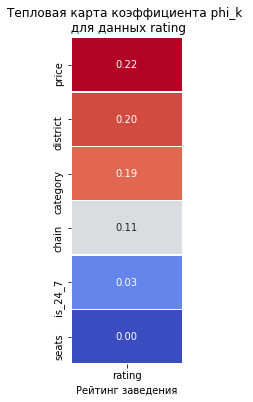

In [206]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Теперь корреляция между рейтингом заведения и другими признаками наглядно отображена

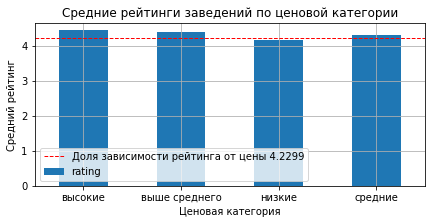

In [207]:
# Построим график столбчатой диаграммы
grouped = df.groupby('price')['rating'].mean()
grouped.plot(kind='bar',
               title=f'Средние рейтинги заведений по ценовой категории',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Ценовая категория',
               rot=0,
               figsize=(7, 3))

# Рассчитываем среднее значение по доле рейтинга
mean_rating_share = df['rating'].mean()

# Наносим на график линию с средним значением доли рейтинга
plt.axhline(mean_rating_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля зависимости рейтинга от цены {round(mean_rating_share,4)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

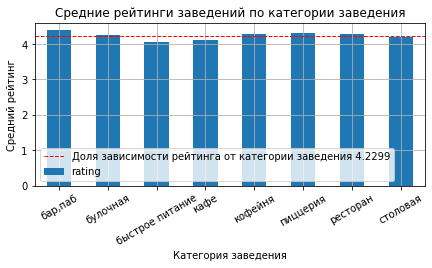

In [208]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['rating'].mean()
grouped.plot(kind='bar',
               title=f'Средние рейтинги заведений по категории заведения',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Категория заведения',
               rot=30,
               figsize=(7, 3))

# Рассчитываем среднее значение по доле нелояльных клиентов
mean_rating_share = df['rating'].mean()

# Наносим на график линию с средним значением доли нелояльных клиентов
plt.axhline(mean_rating_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля зависимости рейтинга от категории заведения {round(mean_rating_share,4)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

Видно, что нет чёткой зависимости между рейтингом и ценами, также как рейтингом и категорией заведения

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [244]:
# Фильтрация данных только для сетевых заведений
filtered_df = df[df['chain'] == 1]

# Группировка данных по названию заведения и подсчёт количества упоминаний каждого заведения
grouped_df = filtered_df.groupby('name').size().reset_index(name='count')

# Сортировка по количеству упоминаний в порядке убывания и выбор топ-15 заведений
top_15_chains = grouped_df.sort_values(by='count', ascending=False).head(15)

# Сгруппировка данных по названию заведения и расчёт среднего рейтинга
average_ratings = filtered_df.groupby('name')['rating'].mean().reset_index(name='average_rating')

# Объединение данных о количестве упоминаний и среднем рейтинге для топ-15 заведений
top_15_with_ratings = pd.merge(top_15_chains, average_ratings, on='name')

print(top_15_with_ratings)

                                   name  count  average_rating
0                           Шоколадница    120        4.177500
1                        Домино'с Пицца     76        4.169737
2                            Додо Пицца     74        4.286486
3                      One Price Coffee     71        4.064789
4                          Яндекс Лавка     69        3.872464
5                                 Cofix     65        4.075385
6                                 Prime     50        4.116000
7                            Хинкальная     44        4.322727
8                              КОФЕПОРТ     42        4.147619
9   Кулинарная лавка братьев Караваевых     39        4.394872
10                              Теремок     38        4.123684
11                              Чайхана     37        3.924324
12                             CofeFest     32        3.984375
13                              Буханка     32        4.396875
14                                Му-Му     27        4

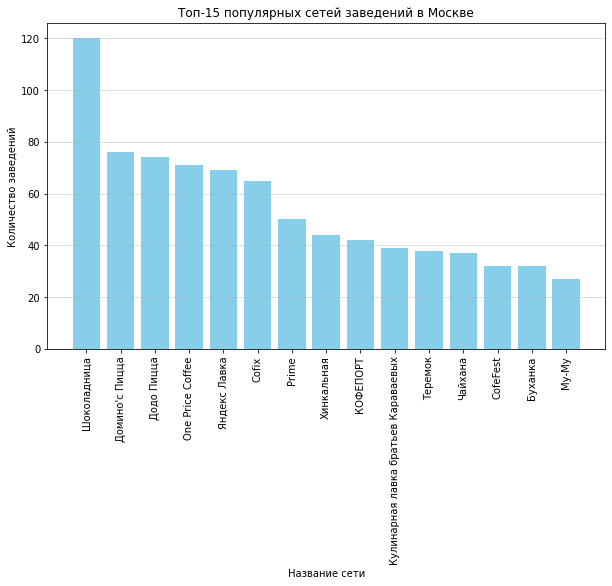

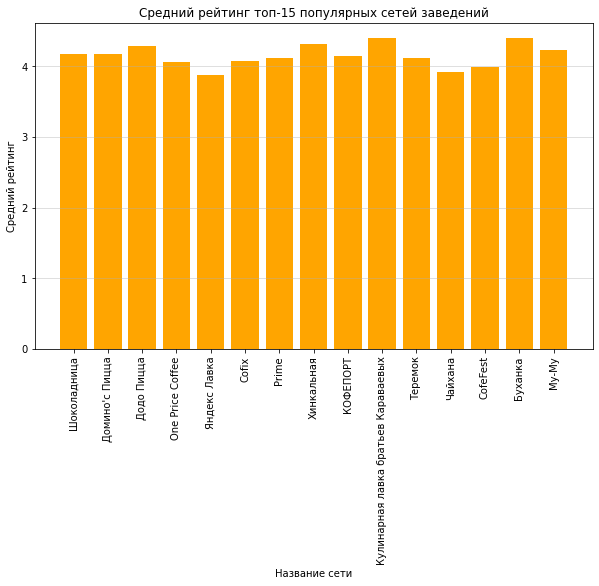

In [245]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(top_15_with_ratings['name'], top_15_with_ratings['count'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Топ-15 популярных сетей заведений в Москве')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(top_15_with_ratings['name'], top_15_with_ratings['average_rating'], color='orange')
plt.xticks(rotation=90)
plt.title('Средний рейтинг топ-15 популярных сетей заведений')
plt.xlabel('Название сети')
plt.ylabel('Средний рейтинг')
plt.grid(axis='y', alpha=0.5)
plt.show()

Исходя из данных выше, можно сделать вывод о том, что в топ-15 входят сетевые заведения, связи между количеством сетевых заведений и рейтингом нет, поэтому можно судить о том, что количесвто никак не влияет на рейтинг заведения.

Большинство сетей имеют схожие показатели, что указывает на высокую конкуренцию в этой сфере.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [211]:
# Разделение данных на две группы: Центральный административный округ и другие районы
cao_df = df[df['district'] == 'Центральный административный округ']
other_df = df[df['district'] != 'Центральный административный округ']

# Расчёт среднего значения среднего чека для каждой группы
avg_cao = cao_df['middle_avg_bill'].mean()
avg_other = other_df['middle_avg_bill'].mean()

print(f"Средний чек в Центральный административный округ: {avg_cao}")
print(f"Средний чек в других районах: {avg_other}")

Средний чек в Центральный административный округ: 1191.0575471698114
Средний чек в других районах: 839.8228817616084


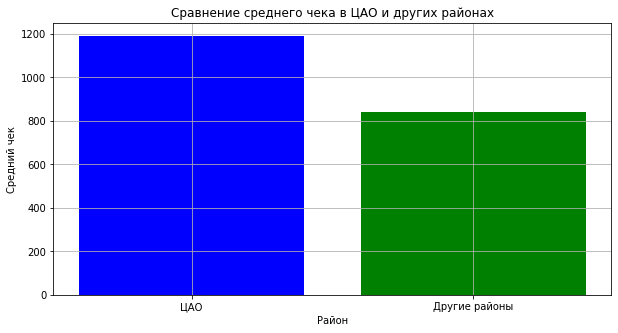

In [212]:
# Построение графика зависимости среднего чека от района
plt.figure(figsize=(10, 5))
plt.bar(['ЦАО', 'Другие районы'], [avg_cao, avg_other], color=['blue', 'green'])
plt.title('Сравнение среднего чека в ЦАО и других районах')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

На основании диаграммы можно сделать вывод, что средний чек в ЦАО значительно выше, чем в других районах. В ЦАО он составляет около 1200, тогда как в других районах — примерно 800. Это может быть связано с более высокой стоимостью товаров или услуг в центральной части города, а также с более высоким уровнем доходов населения в этом районе.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Анализ взаимосвязи данных показал:
- Большинство заведений в городе Москвы являются несетевыми (62%), сетвых заведений - 38% соответственно
- Рестораны (более 1000), кофейни и кафе (около 700) составляют большую часть заведений общественного питания в Москве
- В ценовом диапазоне есть зависимость от того, в каком административном округе находится данное заевдение, например в Центральном административном округе цена значительно выше, чем в других регионах.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

**1. Общий обзор проделанной работы.**

В ходе исследования проанализировали 8406 заведений обещственного питания в Москве, такие как Шоколадница, Додо Пицца, Доминос Пицца, Кулинарная лавка братьев Караваевых, Теремок

62% - это несетвые заведения, 38% - сетевые.

**2. Ответы на исследовательские вопросы, или главные выводы.**

Мы исследовали рейтинг, цены заведений, их расположение и мы можем сделать вывод, что в зависимости от места нахождения, цены варьируются и они увеличены в Центральном административном районе.

Также мы выявиди, что самые популярные сети заведений - это Кафе, Шоколадница и Доминос Пицца

**3. Рекомендации на основе анализа данных.**

В качестве рекомендации стоит обратить внимание на местонахождение заведения, его ценовой диапазон и меню.